## Lab11 - Scikit-learn
* submitted by Subrahmanyam (MM20S300)

### Q1) a) Linear Regression using scikit-learn 
- In this example a linear regression model is built using the algorithm in scikit-learn for the **California Housing dataset**
- Dataset characteristics
  - Number of Instances: 20640
  - Number of Attributes: 8 numeric, predictive attributes and the target
  - Attribute Information
     - MedInc median income in block group
     - HouseAge median house age in block group
     - AveRooms average number of rooms per household
     - AveBedrms average number of bedrooms per household
     - Population block group population
     - AveOccup average number of household members
     - Latitude block group latitude
     - Longitude block group longitude
  - Missing Attribute Values
     - None
- More details <https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Extract Data

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
housing_df = pd.DataFrame(data=housing.data,columns=housing.feature_names)
target = pd.Series(housing.target) #target variable in the values of 100,000
housing_df['Target'] = target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
Target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


### Linear Regression

In [7]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(housing_df)
scaled_df = pd.DataFrame(scaled_df,columns=housing_df.columns)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [9]:
#data for ML model
X = scaled_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = scaled_df[['Target']]

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [11]:
y.head()

,Target
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900


### Train-test split

In [12]:
#split the data into training set(80%) and test set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 8) and size 132096
X_test shape (4128, 8) and size 33024
y_train shape (16512, 1) and size 16512
y_test shape (4128, 1) and size 4128


In [14]:
#linear regression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#intercept
print(f'The intercept is {linreg.intercept_}')
#coefficients
print(f'The coefficients are {linreg.coef_}')

The intercept is [-0.00060304]
The coefficients are [[ 0.73867827  0.10605706 -0.26441499  0.32162476 -0.00199182 -0.03173822
  -0.77702845 -0.75301636]]


### Evaluation

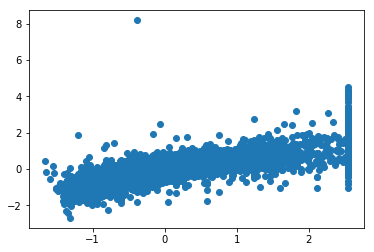

In [17]:
#predictions
pred = linreg.predict(X_test)
plt.scatter(y_test,pred)

### Metrics

In [18]:
#MAE
print(f'The MAE (mean absolute error) is {metrics.mean_absolute_error(y_test,pred)}')
#MSE
print(f'The MSE (mean squared error) is {metrics.mean_squared_error(y_test,pred)}')
#RMSE
print(f'The RMSE (root mean squared error) is {np.sqrt(metrics.mean_squared_error(y_test,pred))}')

The MAE (mean absolute error) is 0.46207392160821764
The MSE (mean squared error) is 0.4174769805249501
The RMSE (root mean squared error) is 0.6461245859158666


In [19]:
#R2 score
print(f'R2 score is {metrics.r2_score(y_test,pred)}')

R2 score is 0.5757877060324508


### b) Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
#data
df = pd.read_csv('Logistic_regression_ls.csv')
df.head()

,x1,x2,label
0,7.395,7.638,1
1,4.987,6.485,1
2,5.358,6.499,1
3,2.036,2.380,0
4,5.956,7.378,1


In [25]:
X = df[['x1','x2']]
y= df['label']

In [27]:
#logistic regression
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
print(f'The intercept and coefficients are respectively intercept = {log_reg.intercept_}, coef = {log_reg.coef_}')

The intercept and coefficients are respectively intercept = [-7.11548968], coef = [[0.94068498 0.94349481]]


In [31]:
b = log_reg.intercept_
w0 = log_reg.coef_[0][0]
w1 = log_reg.coef_[0][1]

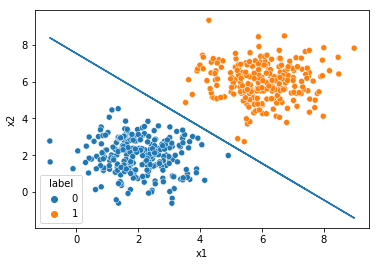

In [35]:
#plot decision boundary
sns.scatterplot(x=df['x1'],y=df['x2'],hue='label',data=df)
plt.plot(df['x1'],-(b/w1)-(w0/w1)*df['x1'])

### Support Vector Machine (SVM)

In [36]:
from sklearn.svm import SVC

In [38]:
svc = SVC(kernel='linear')

In [39]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
print(f'The intercept and coefficients are respectively intercept = {svc.intercept_}, coef = {svc.coef_}')

The intercept and coefficients are respectively intercept = [-10.07409428], coef = [[1.40824207 1.25280051]]


In [42]:
bs = svc.intercept_
w0s = svc.coef_[0][0]
w1s = svc.coef_[0][1]

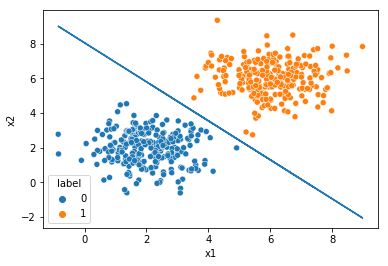

In [43]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue='label',data=df)
plt.plot(df['x1'],-(bs/w1s)-(w0s/w1s)*df['x1'])

### Principal Component Analysis (PCA)

In [57]:
#PCA on iris data set
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [50]:
iris = load_iris()

In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
iris_df = pd.DataFrame(data = load_iris().data, columns=load_iris().feature_names)
iris_df['target'] = load_iris().target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [54]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']] #feature vector 4 features
y = iris_df['target']

In [55]:
#scaling
X = StandardScaler().fit_transform(X)

In [59]:
#pca: this is used to reduce the dimensionn of the feature vector by employing svd algorithm 
# let's reduce the dimensions of X from 4 to 2 using pca class in sklearn

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X)
princ_df = pd.DataFrame(data = principal_comp,columns = ['principal component 1', 'principal component 2'])

In [60]:
princ_df.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [61]:
princ_df['target'] =load_iris().target 
princ_df.head()

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [62]:
#To know the information retained after dimensionality reduction, we can calculate explained variance ratio
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

The first component contains around 72.96% of variance and second component has 22.85% - total around 95.81%